# Data Preprocessing

It refers to the cleaning, transforming, and integrating of data in order to make it ready for analysis.
Steps to follow for data preprocessing:
- Import the necessary libraries.
- Import dataset
- Handle Null values
- Outlier Detection
- Identify dependent and independent variables and seperate them.
- Encoding categorical data.
- Split the data into training and testing sets.
- Perform feature scaling.

## 1. Import necessary libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Import the dataset

The data can be in .csv, .tsv, .json, .excel etc. To read these datasets, we can use:

In [31]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Sometimes, there can be cases where the data might not be present in the same working directory. then we have to giv the raw string path.
Ex: dataset = pd.read_csv(r"C:\Users\Name\File_name\Churn_Modelling")

In [32]:
dataset.head() #Returns first 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
dataset.tail() #Returns last 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [34]:
dataset.shape

(10000, 14)

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


We can see that here are no null values in our dataset.

In [36]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Here, we can see that the 'exited' variable is a dependent varaible. All other varaibles are 'independent' varaibles.

### Correlation

Now, let us plot a correlation matrix. This is to identify the type of dependency/correlation. This step is MANDATORY.

In [37]:
corr = dataset.corr()
corr

C:\Users\Siri\AppData\Local\Temp\ipykernel_16012\897440734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


### Heat Map

<Axes: >

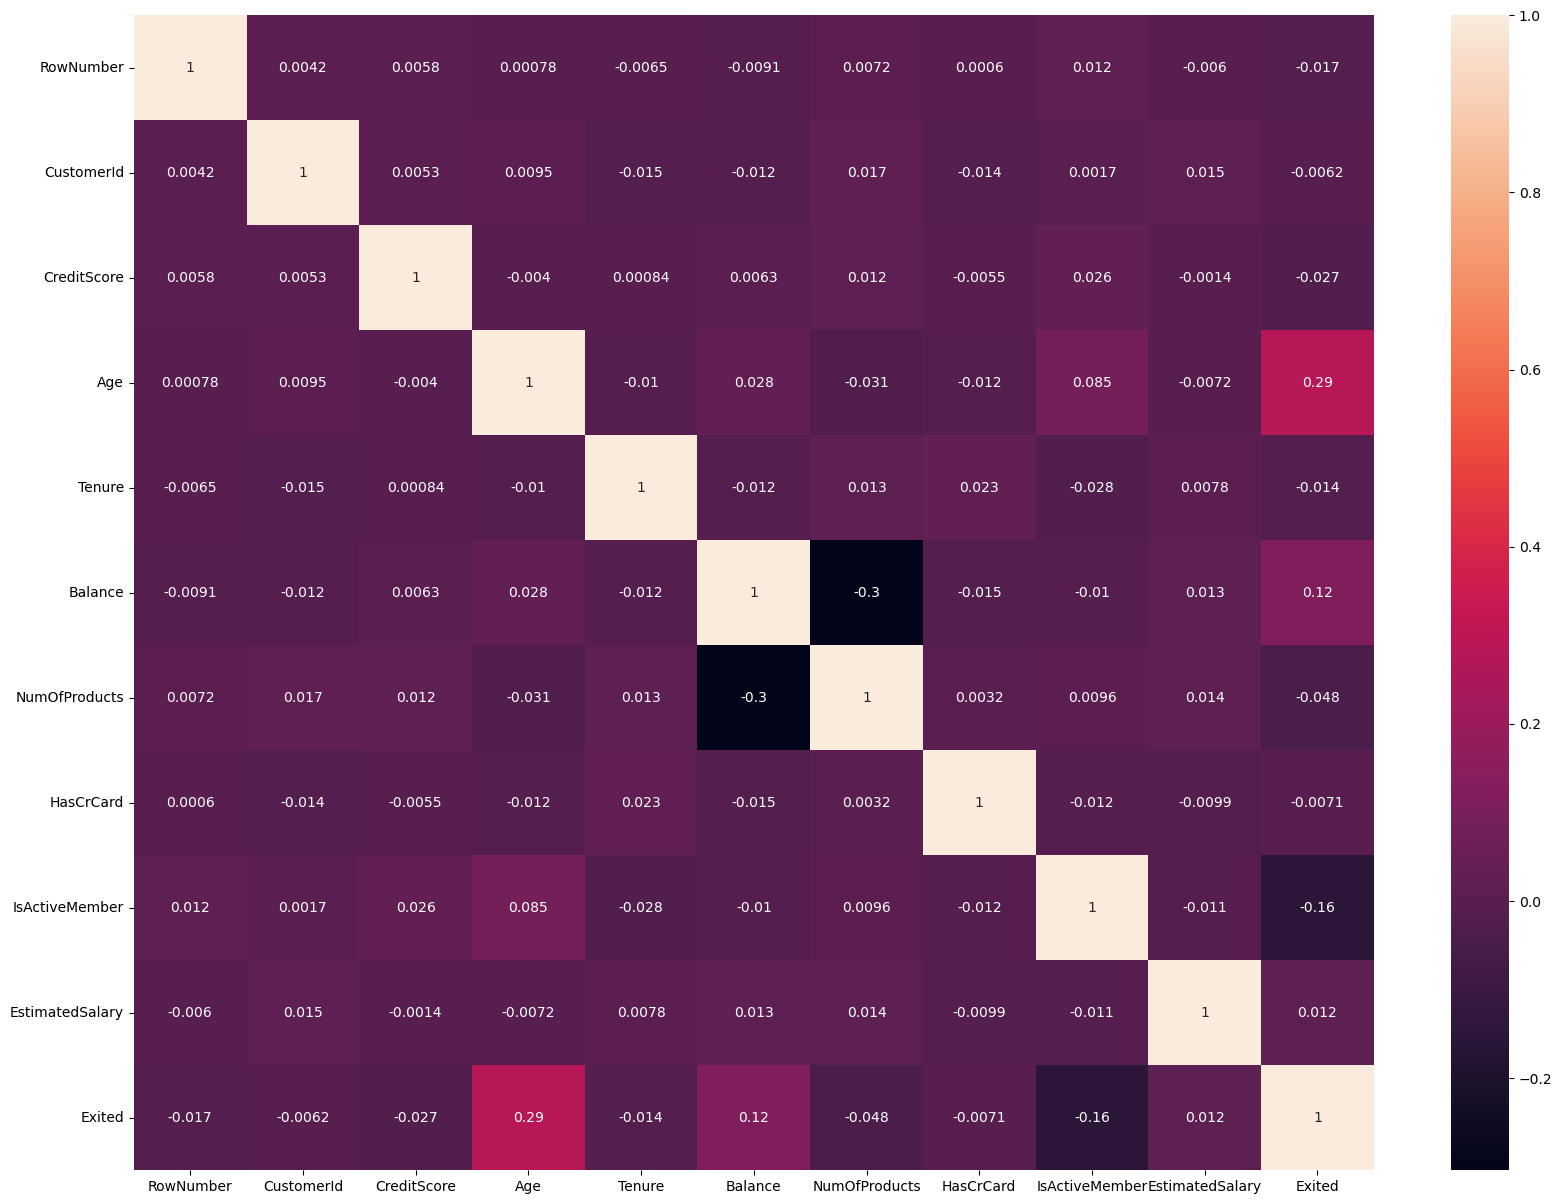

In [38]:
plt.subplots(figsize = (20, 15))
sns.heatmap(corr, annot = True)

Light coloured boxes indicate high correlation.
Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/white because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and lighter the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

In [39]:
dataset.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [40]:
dataset.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## 3. Handling Null values

There are 2 type of handling data:
1. Deleting a specific row or column: Commonly used to handle Null values. If 70-75% of data in a row or a column is Null. Make sure that after removing data does not affect the output/biasing.
2. Imputing the values: Uses the concepts of Mean, Median and Mode. Mean, median, or mode imputation replaces missing values with the mean, median, or mode of the variable, respectively.

Let us check if we have any null values in our dataset.

In [41]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [42]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We can see that there are no null values in the dataset. Hence there is no ned to handle null values in this case.

In case there are null values in age and gender columns, 

This replaces the null values with mean and mode respectively.

## 4. Outlier Detection

<Axes: >

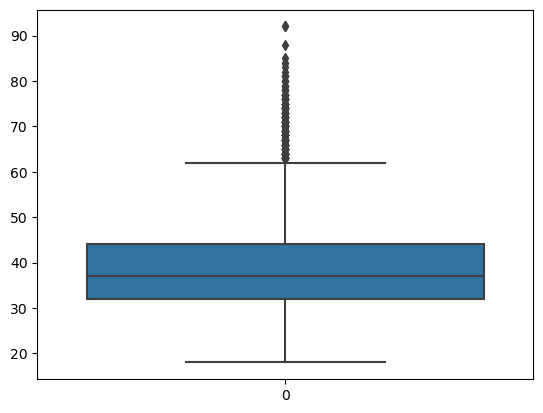

In [43]:
sns.boxplot(dataset.Age)

We can see that there are many outliers.

Types of outlier detection methods:
- IQR(Inter Quartile Range) - The IQR is calculated as the difference between the dataset's third quartile (Q3) and the first quartile (Q1). Q1 is the value at the 25th percentile, and Q3 is at the 75th percentile. Outliers can be detected by identifying data points that fall below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`. These points are considered signficantly different from most of the data and can be labeled as ouliers.
- Z-Score - The Z-score of a data point is calculated as the number of standard deviations it falls away from the mean of the dataset. Z-score represents a data point’s distance from the mean in terms of the standard deviation. Mathematically, the Z-score for a data point x is calculated as -
`Z-score = (x-mean)/standard deviation`
<br>Using Z-Score, we can define the upper and lower bounds of a dataset. A data point with a Z-score greater than a certain threshold (usually 2.5 or 3) is considered an outlier.
- Percentile - 

### Outlier removal by replacement with median

In [44]:
Q1 = dataset.Age.quantile(0.25)
Q3 = dataset.Age.quantile(0.75)
print("The value of Q1:", Q1)
print("The value of Q3:", Q3)

The value of Q1: 32.0
The value of Q3: 44.0


In [45]:
IQR = Q3 - Q1
IQR

12.0

In [46]:
Upper_Limit = Q3 + 1.5*IQR
print("The Upper Limit is:", Upper_Limit)

The Upper Limit is: 62.0


In [47]:
Lower_Limit = Q1 - 1.5*IQR
print("The Lower Limit is:", Lower_Limit)

The Lower Limit is: 14.0


We can replace all the values above Upper Limit with the median. In this case we won't consider the Lower Limit as the outliers lie only above the Upper Quartile.

In [48]:
dataset["Age"].median()

37.0

In [49]:
dataset['Age'] = np.where(dataset['Age']>Upper_Limit, 37, dataset['Age'])

<Axes: >

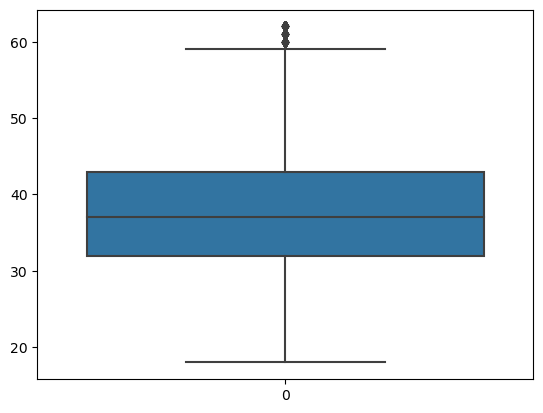

In [50]:
sns.boxplot(dataset.Age)

In [51]:
dataset.shape

(10000, 14)

We can see that we have removed the outliers and replaced it with the median.

## 5. Identify Dependent and Independent variables and seperate them.

Separating the independent variables in the dataset using iloc function and storing it in x:

In [52]:
x = dataset.iloc[:, 3:13]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


Separating the dependent variable ('exited' in this case) and storing it in y.

In [53]:
y = dataset.iloc[:, 13:14]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


## 6. Encoding categorical data

There are two types of encoding:
- Nominal: Data that can be labelled or classified into mutually exclusive categories within a variable.
    *  One hot encoding
    *  One hot encoding with many vategorical variables
    *  Mean Encoding
- Ordinal: A kind of qualitative data that groups variables into ordered categories. The categories have a natural order or rank based on some hierarchal scale, like from high to low.
    * Label Encoding
    * Target Guided Ordinal Encoding

### Label encoding (ordinal)

Let us do label encoding on the 'Gender' column.

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()
x["Gender"] = le.fit_transform(x["Gender"])
x["Gender"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32

In [56]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


Now the 'Gender' column has been encoded.<br>
_Male -> 1, Female -> 0_

In [57]:
x["Gender"].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

i.e., there are 5457 men and 4543 women.

### One Hot Encoding (nominal)

In [58]:
x["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [59]:
x.shape

(10000, 10)

Create dummies.

In [60]:
Geography = pd.get_dummies(x["Geography"], drop_first = True)
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [61]:
x = pd.concat([x, Geography], axis = 1)
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,0,0
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,0


Now, the 'Geography' column is not required.

In [62]:
x.drop(["Geography"], axis = 1, inplace = True)
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0


## 7. Split the data into Training and Testing sets

Train - test split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data.
Split the data set into two pieces — a training set and a testing set. This consists of random sampling without replacement about 75 percent of the rows (you can vary this) and putting them into your training set. The remaining 25 percent is put into your test set. 

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 11)
(3000, 11)
(7000, 1)
(3000, 1)


The model will be trained with (x_train, y_train) and tested with (x_test, y_test).

If you select a different value for random_state, different information would go to “x_train,” “x_test,” “y_train” and “y_test”. The random_state is a pseudo-random number parameter that allows you to reproduce the same train test split each time you run the code. 

With random_state=42, we get the same train and test sets across different executions, but this time, the train and test sets are different from the previous case with random_state=0.

In summary, “random_state” is a parameter in train_test_split that controls the random number generator used to shuffle the data before splitting it. It ensures that the same randomization is used each time you run the code, resulting in the same splits of the data.

Using “random_state” is important for reproducibility, debugging, and comparison of results. By setting this parameter, you can ensure that your experiments are reproducible, debug problems more effectively, and compare the performance of different models more accurately.

## 8. Perform feature scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

There are two types of scaling:
- Standard scaling: The idea behind StandardScaler() is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).
- Min Max scaling: Another way to normalize the input features/variables (apart from the standardization that scales the features so that they have μ=0and σ=1) is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively. This method of scaling requires below two-step:
    - First, we are supposed to find the minimum and the maximum value of the column.
    - Then we will subtract the minimum value from the entry and divide the result by the difference between the maximum and the minimum value.

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [65]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [66]:
print("x_train ----->" , x_train)
print()
print("x_test ------>" , x_test)

x_train -----> [[-0.09792126  0.92295821 -0.54349212 ... -0.76862426 -0.56987189
  -0.5731713 ]
 [-1.12612023  0.92295821  0.14952716 ... -1.39359887 -0.56987189
  -0.5731713 ]
 [-0.62230274 -1.08347268 -0.08147927 ... -1.49739308 -0.56987189
  -0.5731713 ]
 ...
 [ 0.89943174  0.92295821 -0.3124857  ...  1.41400417 -0.56987189
  -0.5731713 ]
 [-0.62230274 -1.08347268  0.03402395 ...  0.84625811 -0.56987189
   1.74467913]
 [-0.28299708 -1.08347268  1.18905609 ...  0.32689267  1.75478035
  -0.5731713 ]]

x_test ------> [[-0.56233235 -1.12586575 -0.33655168 ...  1.61444413  1.66826321
  -0.57529746]
 [-1.33954221 -1.12586575  0.24404352 ...  0.496527   -0.59942579
  -0.57529746]
 [ 0.58247678 -1.12586575  0.47628159 ... -0.4265498  -0.59942579
   1.7382312 ]
 ...
 [ 0.36191723  0.88820536  0.24404352 ...  1.17089933 -0.59942579
  -0.57529746]
 [ 0.43543708  0.88820536 -0.1043136  ... -0.51163936 -0.59942579
  -0.57529746]
 [ 0.84504769 -1.12586575  1.28911487 ... -1.15798768  1.66826321
 